In [3]:
import pandas as pd
import altair as alt

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Load dataset
file_path = 'Updated Real Estate Data.csv'  
real_estate_df = pd.read_csv(file_path)

# Display the first few rows to verify datathe 
print(real_estate_df.head())


     RegionName  RegionID               File Obtained from  SizeRank  \
0  Aberdeen, SD  394297.0  Zillow Home Values Forecast.csv     677.0   
1  Aberdeen, SD  394297.0           Zillow Home Values.csv     677.0   
2  Aberdeen, SD  394297.0              Zillow For-sale.csv     677.0   
3  Aberdeen, SD  394297.0        Zillow Market Heatmap.csv     677.0   
4  Aberdeen, SD  394297.0               Zillow Rentals.csv     677.0   

  RegionType StateName  2018-03-31  2018-04-30  2018-05-31  2018-06-30  ...  \
0        msa        SD         NaN         1.0         1.0         1.0  ...   
1        msa        SD         NaN         NaN         NaN         NaN  ...   
2        msa        SD       189.0       205.0       231.0       263.0  ...   
3        msa        SD        40.0        40.0        42.0        45.0  ...   
4        msa        SD         NaN         NaN         NaN         NaN  ...   

   2024-02-29  2024-03-31  2024-04-30  2024-05-31  2024-06-30  2024-07-31  \
0         NaN  

In [6]:

#Data cleaning
cleaned_df = real_estate_df.dropna(subset=['RegionID', 'SizeRank', 'StateName'])
time_series_columns = cleaned_df.columns[6:]
cleaned_df[time_series_columns] = cleaned_df[time_series_columns].fillna(method='ffill', axis=0).fillna(method='bfill', axis=0)



/var/folders/jd/js8xw9xd7pnbp7tsclp7nrmh0000gn/T/ipykernel_3474/156971232.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_df[time_series_columns] = cleaned_df[time_series_columns].fillna(method='ffill', axis=0).fillna(method='bfill', axis=0)
/var/folders/jd/js8xw9xd7pnbp7tsclp7nrmh0000gn/T/ipykernel_3474/156971232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[time_series_columns] = cleaned_df[time_series_columns].fillna(method='ffill', axis=0).fillna(method='bfill', axis=0)


In [38]:
#Prepare data for Altair (Melt Time Series)

time_series_melted = cleaned_df.melt(
    id_vars=['RegionName', 'StateName', 'RegionType'],
    value_vars=time_series_columns,
    var_name='Date',
    value_name='Property Value'
)
time_series_melted['Date'] = pd.to_datetime(time_series_melted['Date'])


In [39]:
#Line Chart of Property Trends for Selected Regions
selected_regions = ['Aberdeen, SD', 'Austin, TX', 'San Francisco, CA']
line_chart = alt.Chart(time_series_melted[time_series_melted['RegionName'].isin(selected_regions)]).mark_line().encode(
    x='Date:T',
    y='Property Value:Q',
    color='RegionName:N',
    tooltip=['RegionName', 'Date', 'Property Value']
).properties(
    title='Property Value Trends for Selected Regions',
    width=600,
    height=400
)
line_chart.save('Property_Value_Trends.html')
line_chart.display()

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/c

alt.Chart(...)

In [40]:
# Heatmap of Average Property Values by State and Year
time_series_melted['Year'] = time_series_melted['Date'].dt.year
heatmap_data = time_series_melted.groupby(['StateName', 'Year'])['Property Value'].mean().reset_index()
heatmap = alt.Chart(heatmap_data).mark_rect().encode(
    x='Year:O',
    y='StateName:N',
    color='Property Value:Q',
    tooltip=['StateName', 'Year', 'Property Value']
).properties(
    title='Average Property Values by State and Year',
    width=600,
    height=800
)
heatmap.save('State_Year_Heatmap.html')
heatmap.display()

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

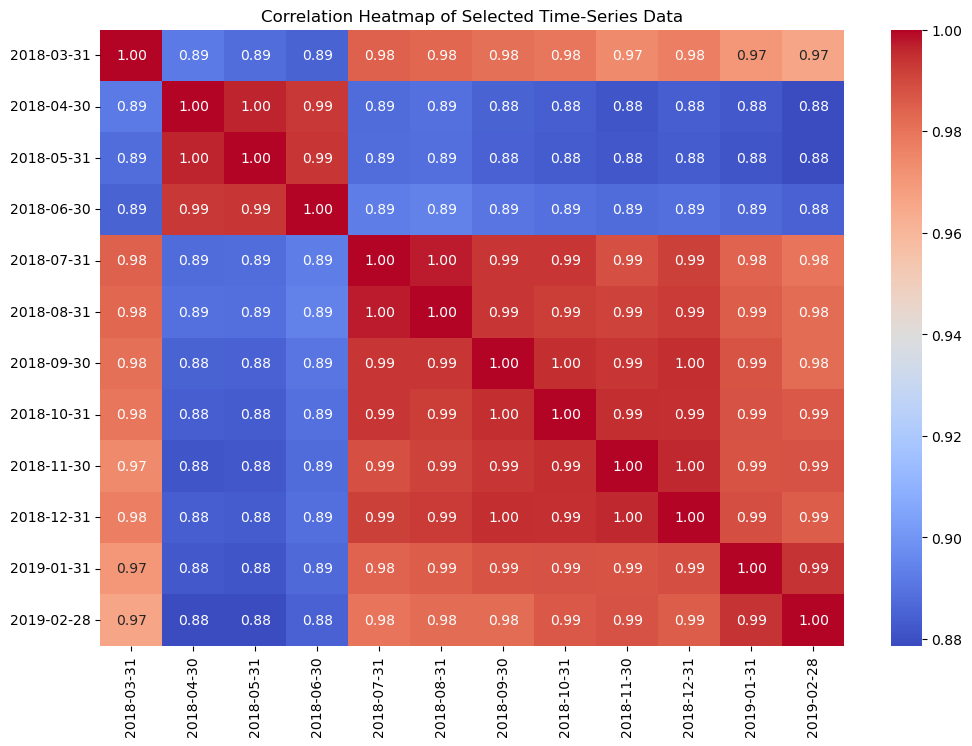

In [41]:
# Correlation Heatmap (Multivariate Analysis)
plt.figure(figsize=(12, 8))
subset_columns = time_series_columns[:12]  # A smaller subset for simplicity
correlation_subset = cleaned_df[subset_columns].corr()
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Time-Series Data')
plt.savefig('Correlation_Heatmap.png')
plt.show()


In [42]:
# Calculate average property value for each city
city_avg_values = real_estate_df.melt(
    id_vars=['RegionName'],
    value_vars=real_estate_df.columns[6:],
    var_name='Date',
    value_name='Property Value'
).groupby('RegionName')['Property Value'].mean().reset_index()

# Get the top 10 cities by average property value
top_10_cities = city_avg_values.nlargest(10, 'Property Value')

# Create bar chart
import altair as alt

bar_chart = alt.Chart(top_10_cities).mark_bar().encode(
    x=alt.X('Property Value:Q', title='Average Property Value'),
    y=alt.Y('RegionName:N', sort='-x', title='City'),
    tooltip=['RegionName:N', 'Property Value:Q']
).properties(
    title='Top 10 Cities by Average Property Value',
    width=600,
    height=400
)

# Display the bar chart
bar_chart.display()

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

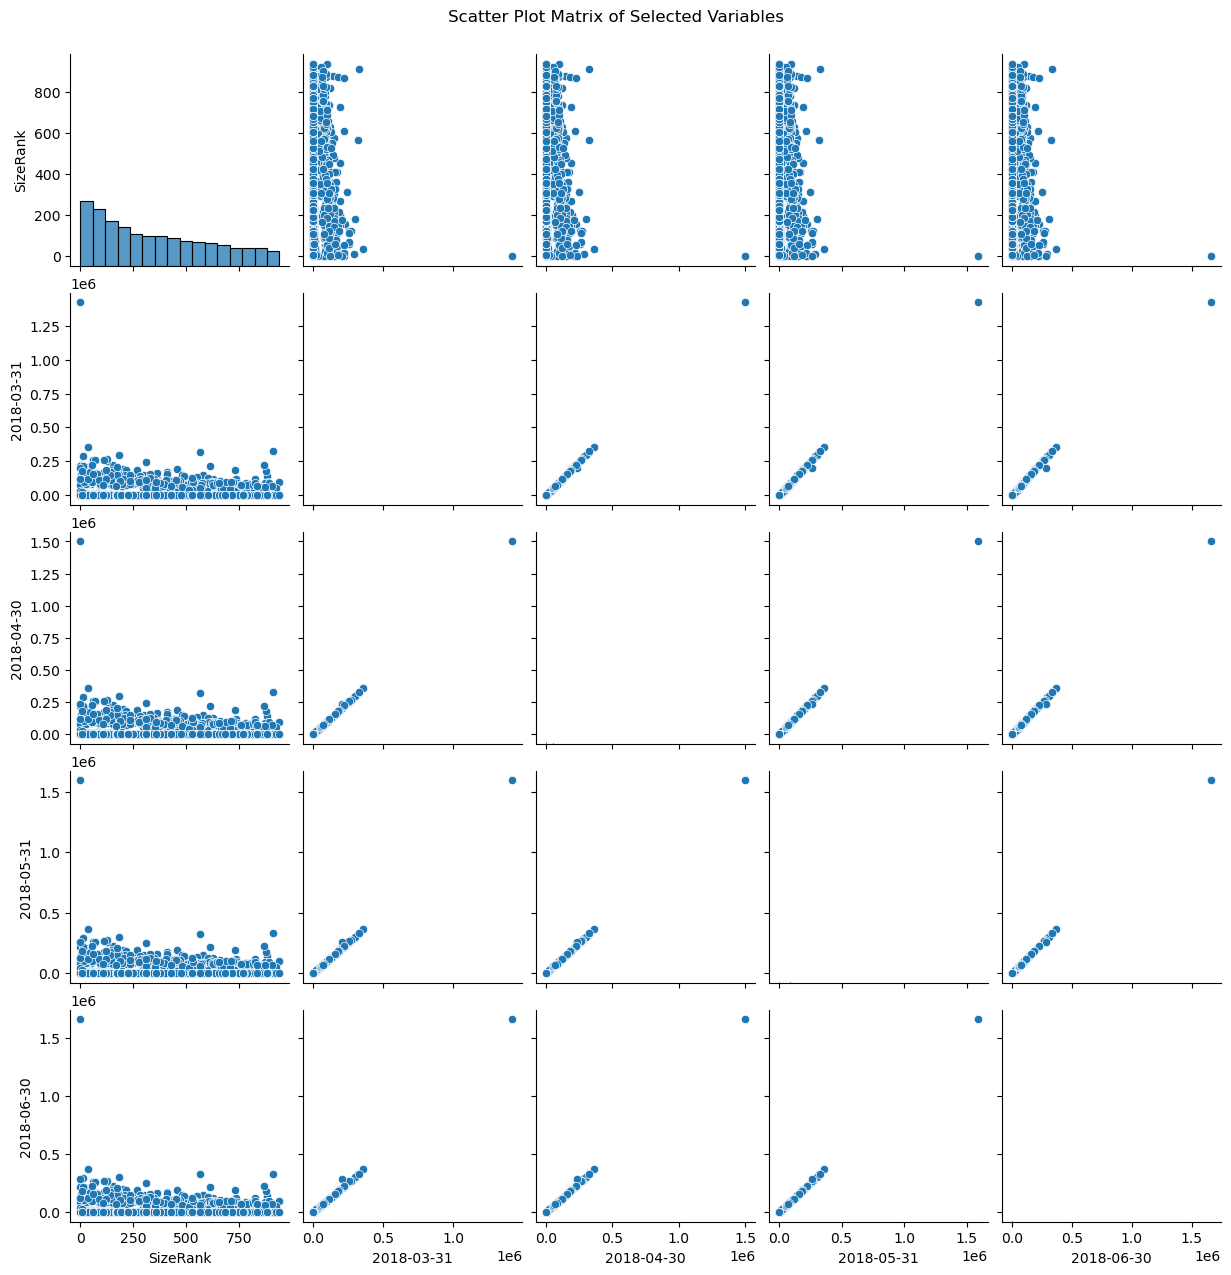

In [43]:
selected_columns = ['SizeRank'] + real_estate_df.columns[6:10].tolist()
pair_plot_data = real_estate_df[selected_columns].dropna()

# Create scatter plot matrix
sns.pairplot(pair_plot_data)
plt.suptitle('Scatter Plot Matrix of Selected Variables', y=1.02)
plt.show()

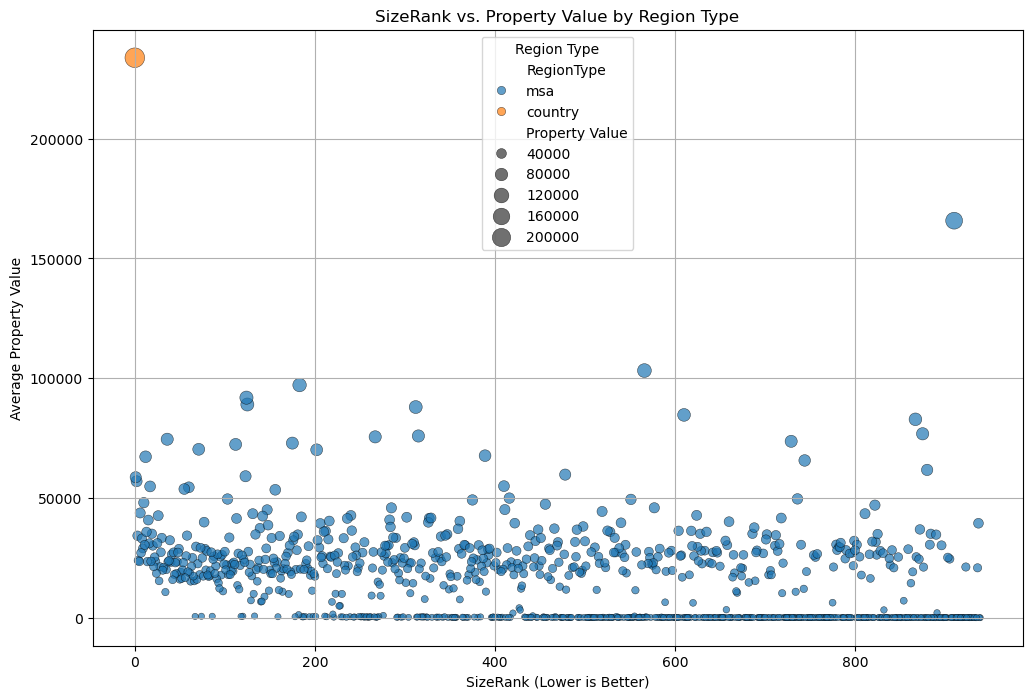

In [49]:

# Calculate average property value by region
bubble_data = real_estate_df.melt(
    id_vars=['RegionName', 'SizeRank', 'RegionType'],
    value_vars=time_series_columns,
    var_name='Date',
    value_name='Property Value'
).groupby(['RegionName', 'SizeRank', 'RegionType'], as_index=False)['Property Value'].mean()

# Create the bubble chart
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='SizeRank',
    y='Property Value',
    size='Property Value',
    hue='RegionType',
    data=bubble_data,
    sizes=(20, 200),
    alpha=0.7,
    edgecolor='black'
)
plt.title('SizeRank vs. Property Value by Region Type')
plt.xlabel('SizeRank (Lower is Better)')
plt.ylabel('Average Property Value')
plt.legend(title='Region Type')
plt.grid(True)
plt.show()
